## Задание 1
Реализуйте градиентный спуск с постоянный шагом (learning rate). Исследовать сходимость при различных значениях шага

Функция: $x^2y^2ln(2x^2+3y^2)$
Точка минимума: $(\pm \frac{1}{2e^{1/4}}, \pm \frac{1}{\sqrt{6} e^{1/4}})$
Приблизительно: (0.389400, 0.317944)


In [686]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, formatter={'float_kind': '{:f}'.format})
plt.rcParams["figure.figsize"] = (20, 10)

In [687]:
def partial(f, i, x):
    h = 1e-3
    x[i] = x[i] + h
    right = f(x)
    x[i] = x[i] - 2 * h
    left = f(x)
    x[i] = x[i] + h
    return (right - left) / (2 * h)


def grad(f, x):
    return [partial(f, i, x) for i in range(len(x))]

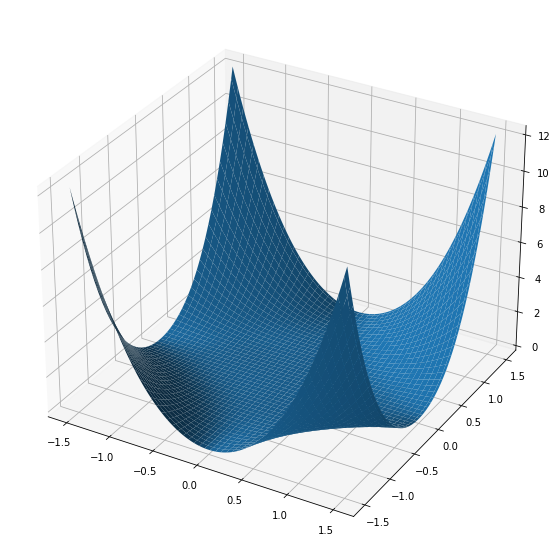

In [688]:
def f1(x):
    return x[0] ** 2 * x[1] ** 2 * np.log(2 * x[0] ** 2 + 3 * x[1] ** 2)


t = np.linspace(-1.5, 1.5, 100)
X = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X[0], X[1], f1(X))

In [689]:
def const_lr(n, start):
    return start


def GB(f, lr, start, lr_strategy=const_lr, epoch=20, draw=False):
    x = start
    points = np.zeros((epoch, 2))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr_strategy(i, lr) * np.array(grad(f, x))
        points[i] = x
    if draw:
        plt.plot(points[:, 0], points[:, 1], 'o-')
        plt.contour(X[0], X[1], f(X), levels=sorted([f(p) for p in points] + list(np.linspace(-1, 1, 100))))
    return points

array([0.274988, 0.230709])

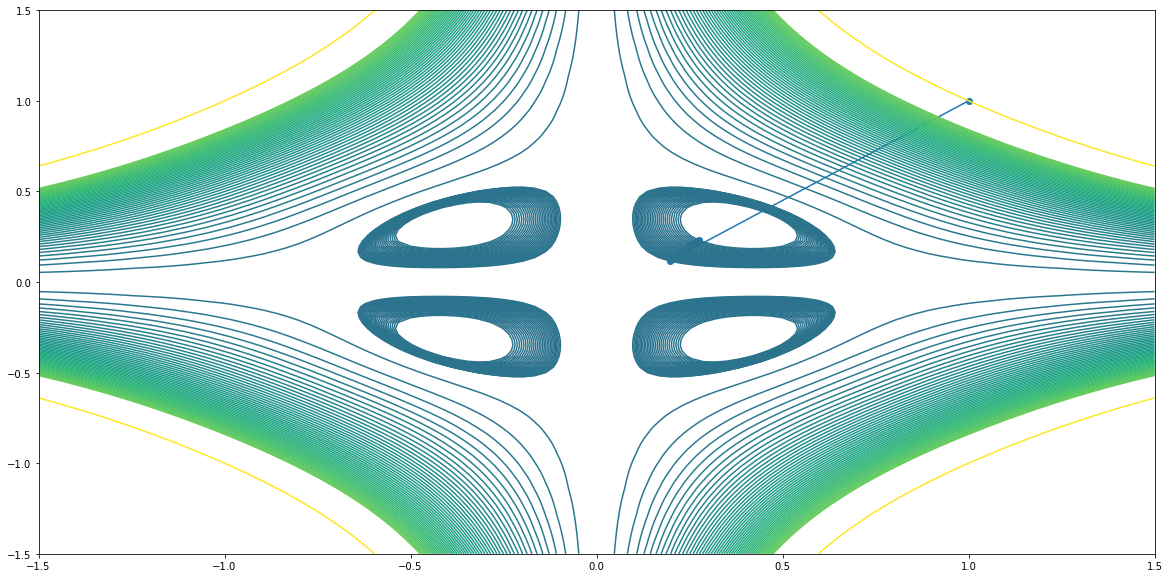

In [690]:
 GB(f1, 0.2, start=[1, 1], epoch=30, draw=True)[-1]

array([-0.378289, -0.324127])

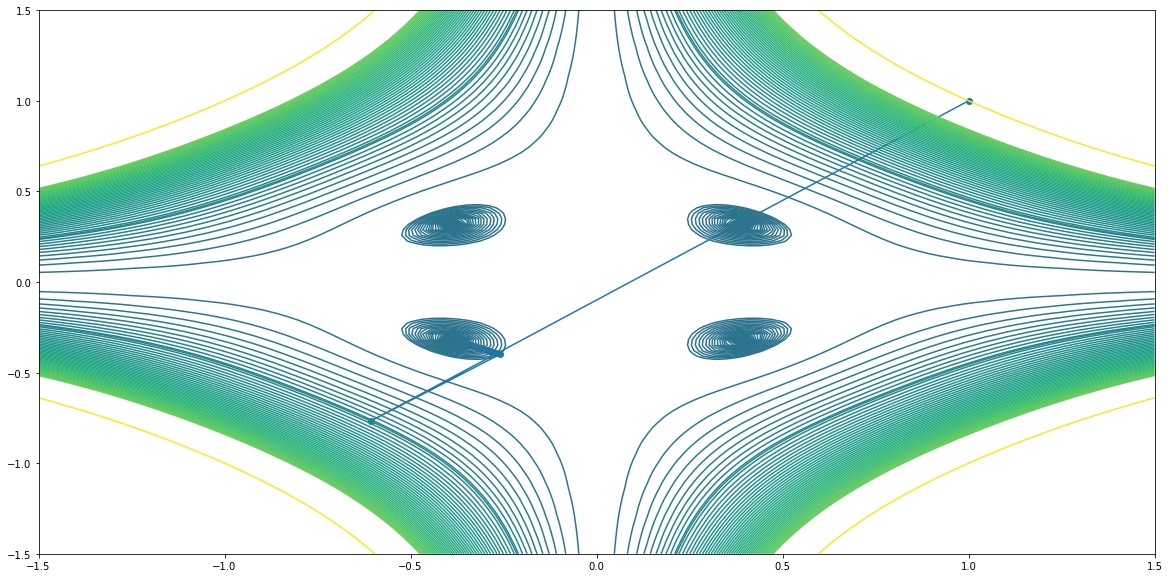

In [691]:
GB(f1, 0.4, start=[1, 1], epoch=30, draw=True)[-1]

array([0.392709, 0.316053])

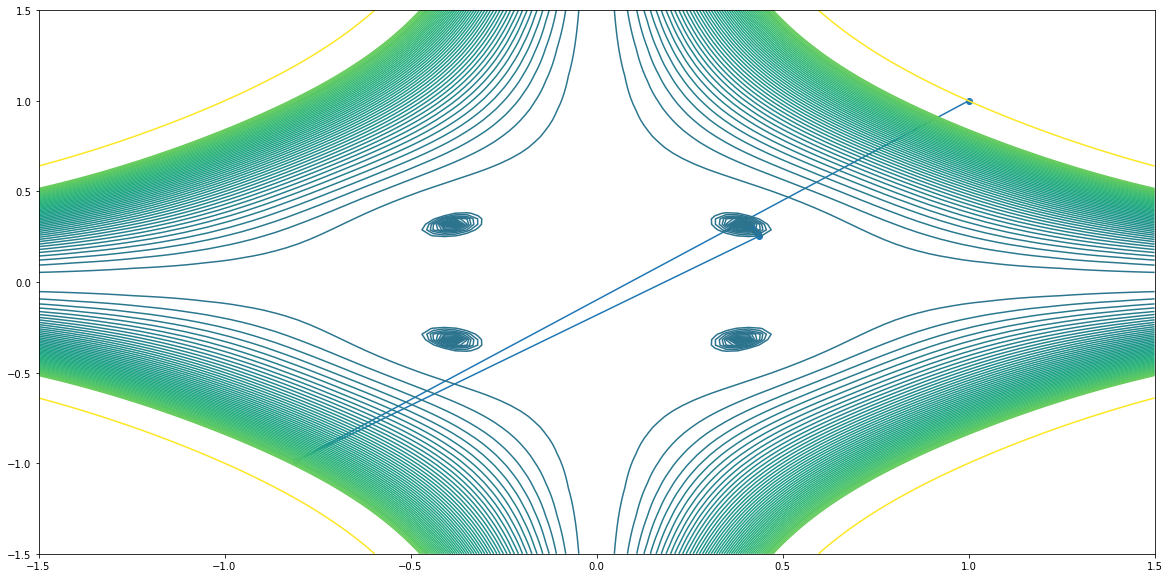

In [692]:
GB(f1, 0.45, start=[1, 1], epoch=30, draw=True)[-1]

array([0.382255, 0.317268])

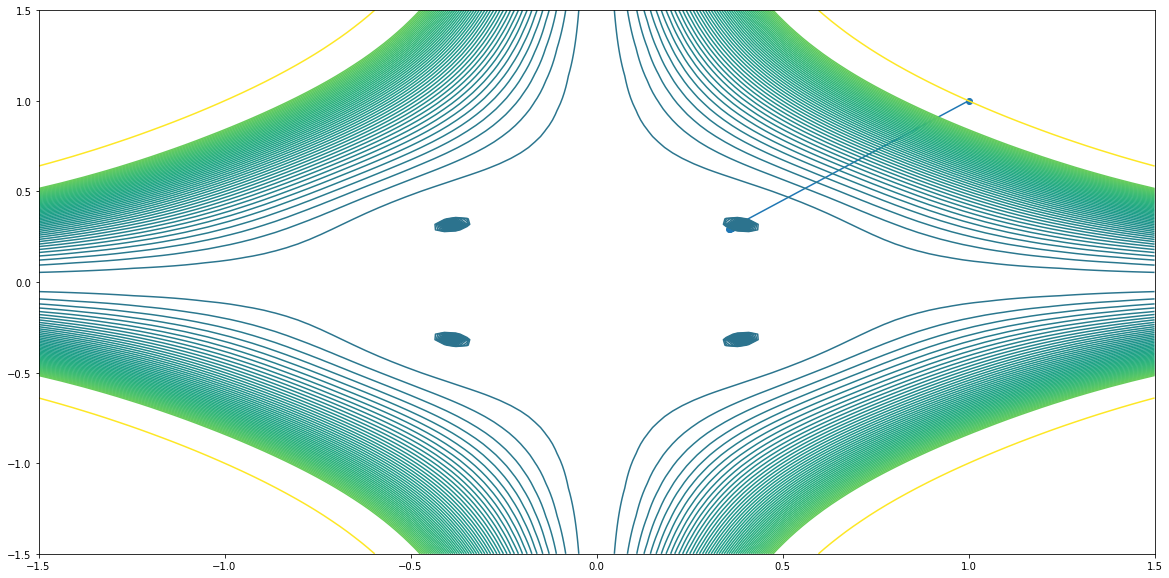

In [693]:
GB(f1, 0.16, start=[1, 1], epoch=30, draw=True)[-1]

## Задание 2
Подберите функцию изменения шага (learning rate scheduling), чтобы улучшить сходимость. Например экспоненциальную или ступенчатую

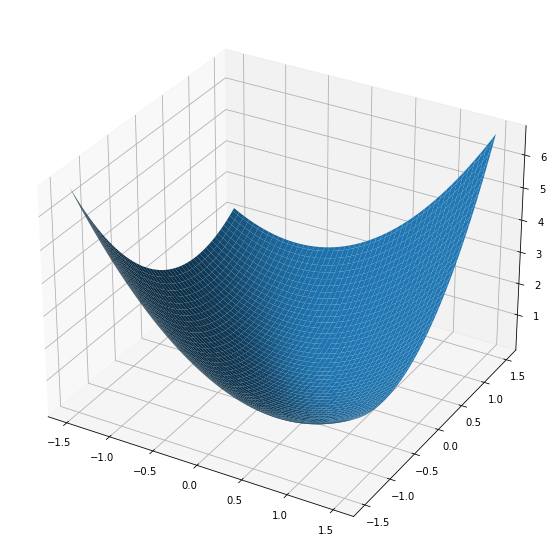

In [694]:
def f2(x):
    return x[0] ** 2 + x[1] ** 2 + x[0] * x[1]


t = np.linspace(-1.5, 1.5, 100)
X = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X[0], X[1], f2(X))

In [695]:
def exp_lr(n, start):
    k = 0.1
    return start * np.exp(-k * n)

In [696]:
print("Constant learning rate: ", GB(f2, 0.6, start=[1, 1], epoch=10)[-1])
print("Exponential decay learning rate: ", GB(f2, 0.6, start=[1, 1], epoch=10, lr_strategy=exp_lr)[-1])

Constant learning rate:  [-0.134218 -0.134218]
Exponential decay learning rate:  [-0.000000 -0.000000]


In [697]:
print("Constant learning rate: ", GB(f2, 0.5, start=[1, 1], epoch=10)[-1])
print("Exponential decay learning rate: ", GB(f2, 0.5, start=[1, 1], epoch=10, lr_strategy=exp_lr)[-1])

Constant learning rate:  [-0.001953 -0.001953]
Exponential decay learning rate:  [0.000000 0.000000]



## Задание 3
Реализовать какой-нибудь метод одномерного поиска (дихотомия, метод Фибоначчи, метод золотого сечения) и градиентный спуск на его основе. Сравнить эффективность с точки зрения количества вычислений минимизируемой функции и ее градиетов

In [698]:
def u(a, x_k):
    return f1(x_k - a * np.array(grad(f1, x_k)))

In [699]:
def find_seg(x_k):
    a = 0.5

    ux_0c = x_k - 0 * np.array(grad(f1, x_k))
    ux_1c = x_k - a * np.array(grad(f1, x_k))

    ux_0 = f1(ux_0c)
    ux_1 = f1(ux_1c)

    if ux_1 < ux_0:

        a = a * 1.5

        ux_2c = x_k - a * np.array(grad(f1, x_k))
        ux_2 = f1(ux_2c)

        while ux_1 > ux_2:
            a *= 1.5
            ux_2c = x_k - a * np.array(grad(f1, x_k))
            ux_2 = f1(ux_2c)

    return [0, a]


In [700]:
def dih(a, b, x_k):
    h = 1e-5
    while b - a > 0.1:
        m = (a + b) / 2
        left = u(m - h, x_k)
        right = u(m + h, x_k)
        if left < right:
            b = m + h
        elif left > right:
            a = m - h
    return x_k - a * np.array(grad(f1, x_k))

In [701]:
x_prev = [1, 1]
seg = find_seg(x_prev)
x = dih(seg[0], seg[1], x_prev)

cnt = 0
while True:
    cnt += 1
    if np.linalg.norm(x - x_prev) < 0.00001:
        break
    seg = find_seg(x)
    x_prev = x
    x = dih(seg[0], seg[1], x)

print("Found min: ", x)
print("Number of iterations: ", cnt)

Found min:  [-0.389399 -0.317944]
Number of iterations:  6


## Задание 5
Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: придумайте 2-3 квадратичные двумерные функции, на которых работа метода будет отличаться, нарисуйте графики с линиями уровня функций и траекториями методов.

Попробуйте ответить на следующий вопрос: Как отличается поведение метода в зависимости от числа обусловленности функции, выбора начальной точки и стратегии выбора шага?

In [702]:
def small(x):
    return 1 / 100 * (x[0] ** 2 + x[1] ** 2)


def big(x):
    return 100 * (x[0] ** 2 + x[1] ** 2)


def normal(x):
    return x[0] ** 2 + x[1] ** 2

array([[1.000000, 1.000000],
       [0.996800, 0.996800],
       [0.993610, 0.993610],
       [0.990431, 0.990431],
       [0.987261, 0.987261],
       [0.984102, 0.984102],
       [0.980953, 0.980953],
       [0.977814, 0.977814],
       [0.974685, 0.974685],
       [0.971566, 0.971566],
       [0.968457, 0.968457],
       [0.965358, 0.965358],
       [0.962269, 0.962269],
       [0.959189, 0.959189],
       [0.956120, 0.956120],
       [0.953060, 0.953060],
       [0.950011, 0.950011],
       [0.946971, 0.946971],
       [0.943940, 0.943940],
       [0.940920, 0.940920],
       [0.937909, 0.937909],
       [0.934907, 0.934907],
       [0.931916, 0.931916],
       [0.928934, 0.928934],
       [0.925961, 0.925961],
       [0.922998, 0.922998],
       [0.920044, 0.920044],
       [0.917100, 0.917100],
       [0.914165, 0.914165],
       [0.911240, 0.911240],
       [0.908324, 0.908324],
       [0.905418, 0.905418],
       [0.902520, 0.902520],
       [0.899632, 0.899632],
       [0.8967

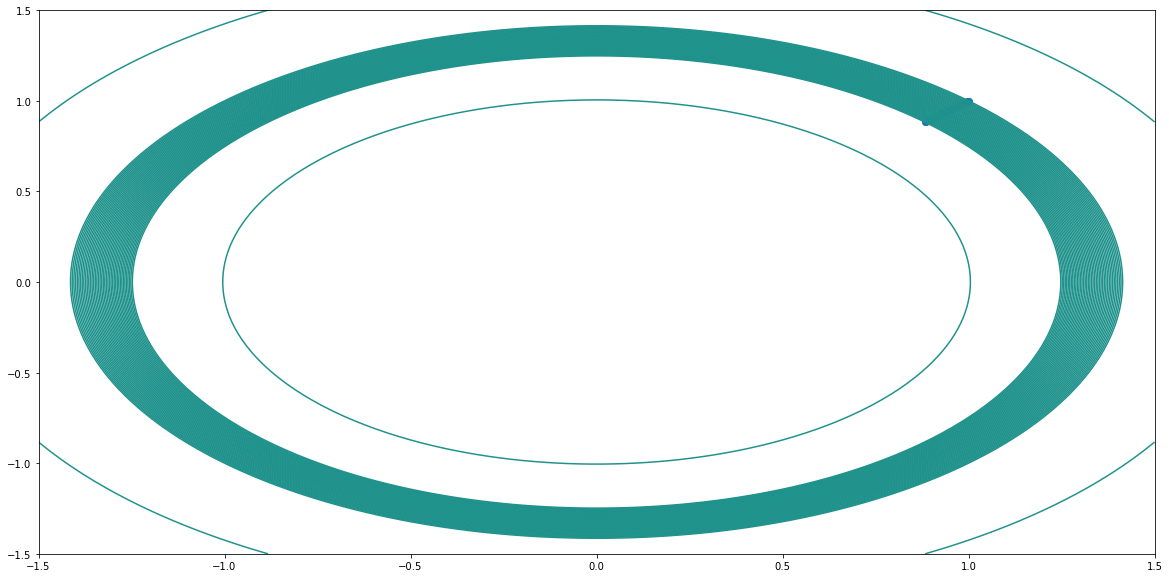

In [703]:
GB(small, 0.16, start=[1,1], epoch=40, draw=True)

array([[1.000000, 1.000000],
       [0.680000, 0.680000],
       [0.462400, 0.462400],
       [0.314432, 0.314432],
       [0.213814, 0.213814],
       [0.145393, 0.145393],
       [0.098867, 0.098867],
       [0.067230, 0.067230],
       [0.045716, 0.045716],
       [0.031087, 0.031087],
       [0.021139, 0.021139],
       [0.014375, 0.014375],
       [0.009775, 0.009775],
       [0.006647, 0.006647],
       [0.004520, 0.004520],
       [0.003074, 0.003074],
       [0.002090, 0.002090],
       [0.001421, 0.001421],
       [0.000966, 0.000966],
       [0.000657, 0.000657],
       [0.000447, 0.000447],
       [0.000304, 0.000304],
       [0.000207, 0.000207],
       [0.000141, 0.000141],
       [0.000096, 0.000096],
       [0.000065, 0.000065],
       [0.000044, 0.000044],
       [0.000030, 0.000030],
       [0.000020, 0.000020],
       [0.000014, 0.000014],
       [0.000009, 0.000009],
       [0.000006, 0.000006],
       [0.000004, 0.000004],
       [0.000003, 0.000003],
       [0.0000

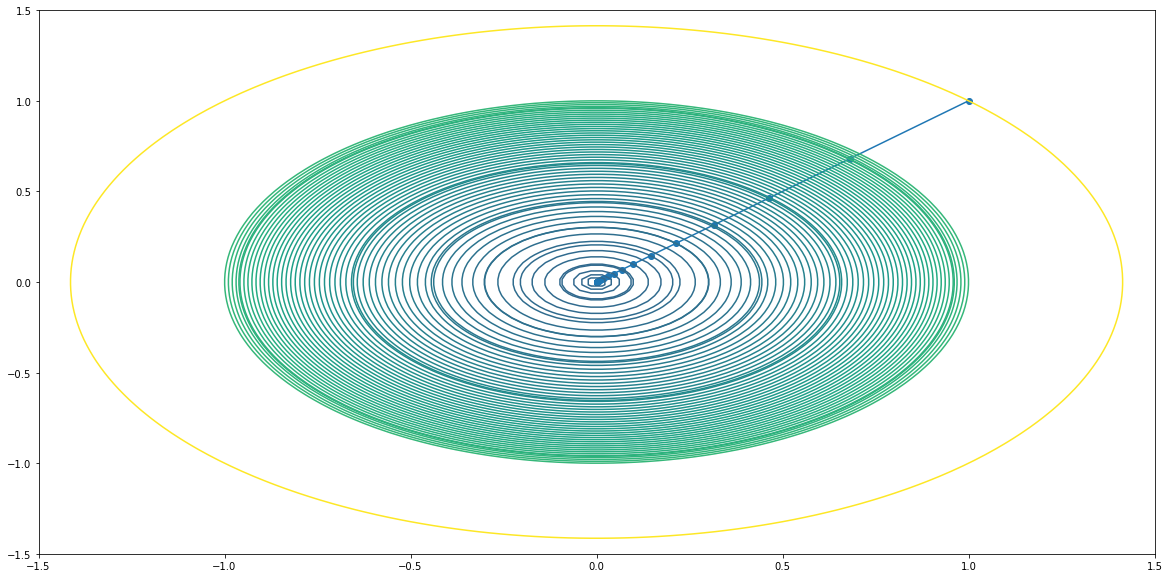

In [704]:
GB(normal, 0.16, start=[1,1], epoch=40, draw=True)

array([[1.000000, 1.000000],
       [-31.000000, -31.000000],
       [961.000000, 961.000000],
       [-29790.999998, -29790.999998],
       [923521.001955, 923521.001955],
       [-28629151.498045, -28629151.498045],
       [887505248.501955, 887502688.501955],
       [-27513175711.498043, -27510556831.498043],
       [850270765408.501953, 850273384288.501953],
       [-28011909463711.500000, -25263127775391.500000]])

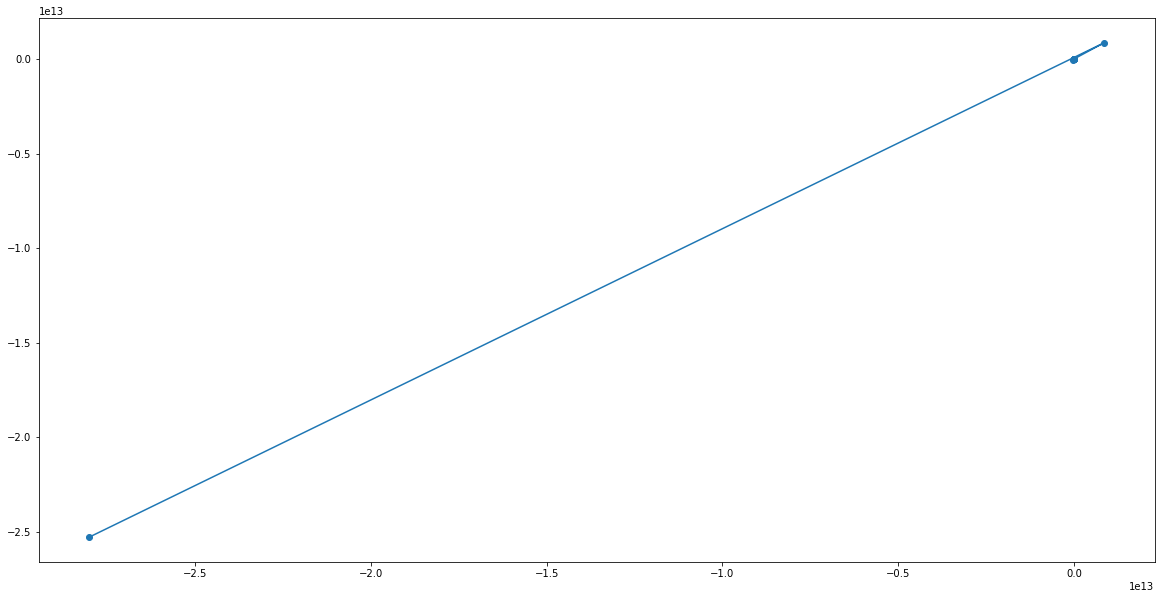

In [705]:
GB(big, 0.16, start=[1,1], epoch=10, draw=True)

Вывод: TODO